**Dataset Explanation:**

1. Unnamed 0: The index of the dataset.
2. Email_hash: An anonymized identifier representing the email of the learner.
3. Company_hash: An anonymized identifier indicating the current employer of the
learner.
4. orgyear: Represents the year the learner began employment at the current
company.
5. CTC: Current Compensation to the Company (CTC) of the learner.
6. Job_position: Represents the job profile or role of the learner within their
company.
7. CTC_updated_year: The year in which the learner's CTC was most recently
updated. This could be due to yearly increments, promotions, or other factors.

In [6]:
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
df=pd.read_csv("cluster.csv")


**Definition of problem**

Assuming you're a data scientist at Scaler, you're tasked with the responsibility of
analyzing the dataset to profile the best companies and job positions from Scaler's
database. Your primary goal is to execute clustering techniques, evaluate the

coherence of your clusters, and provide actionable insights for enhanced learner
profiling and course tailoring.

In [ ]:
df.head(5)

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


#Observations on Data

In [ ]:
df.shape

(205843, 7)

The numbers "205843" and "7" likely represent the dimensions of a dataset, with 205,843 rows and 7 columns.

In [114]:
df.drop(columns=["Unnamed: 0"],inplace=True)

Removed Unnamed: 0 column from dataset because it is an index column and it is not require for further analysis

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   orgyear           205757 non-null  float64
 2   ctc               205843 non-null  int64  
 3   job_position      153281 non-null  object 
 4   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 7.9+ MB


In [56]:
round((df.isna().sum()/len(df))*100,2)

company_hash         0.02
orgyear              0.04
ctc                  0.00
job_position        25.53
ctc_updated_year     0.00
dtype: float64

Approximately 25.53% of the data is missing values for the "job_position" column, suggesting potential data incompleteness or variability in job position reporting.

In [115]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
orgyear,205757.0,2.014883e+03,6.357112e+01,0.0,2013.0,2016.0,2018.0,2.016500e+04
ctc,205843.0,2.271685e+06,1.180091e+07,2.0,530000.0,950000.0,1700000.0,1.000150e+09
ctc_updated_year,205843.0,2.019628e+03,1.325104e+00,2015.0,2019.0,2020.0,2021.0,2.021000e+03


In [116]:
df.drop_duplicates(inplace=True)
df.isna().sum()

company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52547
ctc_updated_year        0
dtype: int64

In [117]:
df["email_hash"].value_counts()

bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
c0eb129061675da412b0deb15871dd06ef0d7cd86eb5f7e8cc6a20b0d1938183     8
                                                                    ..
63933d31becd1487d93d56844919896334e3ae39c4095979816c6fbb8816153a     1
23bcc14067e0fec60b8772b3e20abbb8fa9f2146738d37056e0d20d33a97c690     1
5a1c9d9a745d6ee95136047698dba8f68f00bac522de6d83d18cf062f7286e22     1
062597458dc597d35b2dbf3e417ac160244dc8c3dd50fce716837dc1e6fc7a10     1
0bcfc1d05f2e8dc4147743a1313aa70a119b41b30d4a1f7e738a6a87d3712c31     1
Name: email_hash, Length: 153443, dtype: int64

In [89]:
df["years_of_ex"]=2024-df["orgyear"]


creating new feature as years_of_ex it will calculate the total year of ex candidate have

In [ ]:
df.job_position.value_counts()

Backend Engineer                  43554
FullStack Engineer                24717
Other                             18071
Frontend Engineer                 10417
Engineering Leadership             6870
                                  ...  
ayS                                   1
Principal Product Engineer            1
Senior Director of Engineering        1
Seller Support Associate              1
Android Application developer         1
Name: job_position, Length: 1017, dtype: int64

In [90]:
%%time
import re

# Example NumPy array
my_array = np.array(df["company_hash"])

# Function to apply re.sub() to each element
def clean_string(s):
    return re.sub('[^A-Za-z0-9 ]+', '', str(s))

# Apply the function to each element in the array using vectorized function
df["clean_company_hash"] = np.vectorize(clean_string)(my_array)
df.drop(columns="company_hash",inplace=True)

CPU times: user 409 ms, sys: 161 ms, total: 570 ms
Wall time: 575 ms


Clean company hash using regex

In [118]:
q1=df.orgyear.quantile(0.25)
q3=df.orgyear.quantile(0.75)
iqr=q3-q1
df=df.loc[(df.orgyear>=q1-1.5*iqr) & (df.orgyear<=q3+1.5*iqr)]

removing outliers

In [122]:
df.company_hash.value_counts()


nvnv wgzohrnvzwj otqcxwto                   8269
xzegojo                                     5303
vbvkgz                                      3423
zgn vuurxwvmrt vwwghzn                      3266
wgszxkvzn                                   3156
                                            ... 
vvxzegntwyucnrna                               1
ntwyzg xzaxv zlq xzonxnhnt ge ntwyzgrgsj       1
vsxrxnj otqcxwto                               1
avxrjpxn                                       1
bvptbjnqxu td vbvkgz                           1
Name: company_hash, Length: 35506, dtype: int64

In [123]:
df = df.dropna()

In [124]:
df["YOE"]=2024-df["orgyear"]

<ipython-input-124-0fee0fbbe837>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["YOE"]=2024-df["orgyear"]


creating new feature as year of ex

**bivariate analysis**

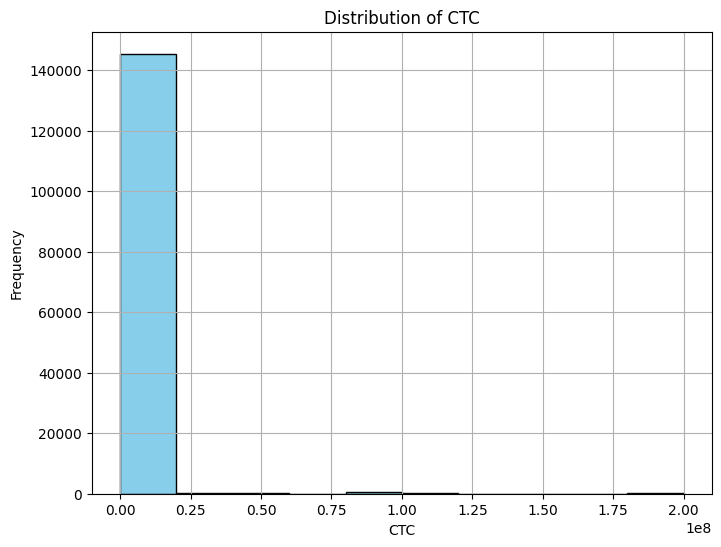

In [140]:
# Plot histogram for the 'ctc' column
plt.figure(figsize=(8, 6))
plt.hist(df['ctc'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of CTC')
plt.xlabel('CTC')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [126]:
ctc_cluster=df.groupby(['YOE','job_position','company_hash'])['ctc'].describe()
ctc_cluster

count  \
YOE   job_position           company_hash                              
-1.0  Backend Engineer       zgn vuurxwvmrt vwwghzn              1.0   
      Devops Engineer        lvj vbmt                            1.0   
      Engineering Leadership otre tburgjta                       1.0   
      Frontend Engineer      nhqxzs                              1.0   
      FullStack Engineer     nyt qtnyxzpsqghu xzw                1.0   
...                                                              ...   
 18.0 iOS Engineer           wxnqho urvnegqb ogrhnxgz ucn rna    1.0   
                             xztneqvbt ntwyzgrgsxto              1.0   
                             zgn vuurxwvmrt vwwghzn              1.0   
                             zvsvqqg                             1.0   
      operation              lubgqsvz wyvot  wg                  1.0   

                                                                     mean  \
YOE   job_position           company_hash                                   
-1.0  Backend Engineer       zgn vuurxwvmrt vwwghzn               56000.0   
      Devops Engineer        lvj vbmt                            150000.0   
      Engineering Leadership otre tburgjta                     10000000.0   
      Frontend Engineer      nhqxzs                               42000.0   
      FullStack Engineer     nyt qtnyxzpsqghu xzw                120000.0   
...                                                                   ...   
 18.0 iOS Engineer           wxnqho urvnegqb ogrhnxgz ucn rna   1800000.0   
                             xztneqvbt ntwyzgrgsxto             3000000.0   
                             zgn vuurxwvmrt vwwghzn              720000.0   
                             zvsvqqg                            8100000.0   
      operation              lubgqsvz wyvot  wg                  800000.0   

                                                               std  \
YOE   job_position           company_hash                            
-1.0  Backend Engineer       zgn vuurxwvmrt vwwghzn            NaN   
      Devops Engineer        lvj vbmt                          NaN   
      Engineering Leadership otre tburgjta                     NaN   
      Frontend Engineer      nhqxzs                            NaN   
      FullStack Engineer     nyt qtnyxzpsqghu xzw              NaN   
...                                                            ...   
 18.0 iOS Engineer           wxnqho urvnegqb ogrhnxgz ucn rna  NaN   
                             xztneqvbt ntwyzgrgsxto            NaN   
                             zgn vuurxwvmrt vwwghzn            NaN   
                             zvsvqqg                           NaN   
      operation              lubgqsvz wyvot  wg                NaN   

                                                                      min  \
YOE   job_position           company_hash                                   
-1.0  Backend Engineer       zgn vuurxwvmrt vwwghzn               56000.0   
      Devops Engineer        lvj vbmt                            150000.0   
      Engineering Leadership otre tburgjta                     10000000.0   
      Frontend Engineer      nhqxzs                               42000.0   
      FullStack Engineer     nyt qtnyxzpsqghu xzw                120000.0   
...                                                                   ...   
 18.0 iOS Engineer           wxnqho urvnegqb ogrhnxgz ucn rna   1800000.0   
                             xztneqvbt ntwyzgrgsxto             3000000.0   
                             zgn vuurxwvmrt vwwghzn              720000.0   
                             zvsvqqg                            8100000.0   
      operation              lubgqsvz wyvot  wg                  800000.0   

                                                                      25%  \
YOE   job_position           company_hash                                   
-1.0  Backend Engineer       zgn vuurxwvmrt vwwghzn      

In [135]:

merged_data = pd.merge(df, ctc_cluster, on=['company_hash', 'job_position', 'YOE'], how='left')

# Create flags for learners with CTC greater than the average of their company's department having the same years of experience
merged_data['Flag'] = 0
merged_data.loc[merged_data['ctc'] > merged_data['mean'], 'Flag'] = 1
merged_data.loc[merged_data['ctc'] > 1.5 * merged_data['mean'], 'Flag'] = 2
merged_data.loc[merged_data['ctc'] > 2 * merged_data['mean'], 'Flag'] = 3

# Create flag for class at Company & Job Position level
merged_data['Class'] = merged_data.groupby(['company_hash', 'job_position'])['Flag'].transform('max')

# Create flag for tier at Company level
merged_data['Tier'] = merged_data.groupby(['company_hash'])['Flag'].transform('max')

In [137]:
# 1. Top 10 employees (earning more than most of the employees in the company) - Tier 1
company_avg_ctc = merged_data.groupby('company_hash')['ctc'].mean()
merged_data['Tier'] = merged_data['company_hash'].map(lambda x: 1 if merged_data.loc[merged_data['company_hash'] == x, 'ctc'].mean() <= merged_data['ctc'].mean() else 3)
top_10_tier1 = merged_data[merged_data['Tier'] == 1].nlargest(10, 'ctc')

# 2. Top 10 employees of data science in Amazon / TCS etc earning more than their peers - Class 1
top_10_class1 = merged_data[(merged_data['company_hash'].isin(['Amazon', 'TCS'])) & (merged_data['job_position'] == 'Data Science')].nlargest(10, 'ctc')

# 3. Bottom 10 employees of data science in Amazon / TCS etc earning less than their peers - Class 3
bottom_10_class3 = merged_data[(merged_data['company_hash'].isin(['Amazon', 'TCS'])) & (merged_data['job_position'] == 'Data Science')].nsmallest(10, 'ctc')

# 4. Bottom 10 employees (earning less than most of the employees in the company)- Tier 3
bottom_10_tier3 = merged_data[merged_data['Tier'] == 3].nsmallest(10, 'ctc')

# 5. Top 10 employees in Amazon- X department - having 5/6/7 years of experience earning more than their peers - Tier X
top_10_tierX = merged_data[(merged_data['company_hash'] == 'Amazon') & (merged_data['job_position'] == 'Data Science') & (merged_data['years_of_experience'].isin([5, 6, 7]))].nlargest(10, 'ctc')

# 6. Top 10 companies (based on their CTC)
top_10_companies = merged_data.groupby('company_hash')['ctc'].sum().nlargest(10)

# 7. Top 2 positions in every company (based on their CTC)
top_2_positions = merged_data.groupby(['company_hash', 'job_position'])['ctc'].mean().groupby('company_hash').nlargest(2)

# Displaying the results
print("1. Top 10 employees (earning more than most of the employees in the company) - Tier 1:")
print(top_10_tier1)
print("\n2. Top 10 employees of data science in Amazon / TCS etc earning more than their peers - Class 1:")
print(top_10_class1)
print("\n3. Bottom 10 employees of data science in Amazon / TCS etc earning less than their peers - Class 3:")
print(bottom_10_class3)
print("\n4. Bottom 10 employees (earning less than most of the employees in the company)- Tier 3:")
print(bottom_10_tier3)
print("\n5. Top 10 employees in Amazon- X department - having 5/6/7 years of experience earning more than their peers - Tier X:")
print(top_10_tierX)
print("\n6. Top 10 companies (based on their CTC):")
print(top_10_companies)
print("\n7. Top 2 positions in every company (based on their CTC):")
print(top_2_positions)


**Model Building**

In [145]:
from sklearn.cluster import KMeans,AgglomerativeClustering

In [149]:
df=df.loc[:1000]
df.columns

Index(['company_hash', 'email_hash', 'orgyear', 'ctc', 'job_position',
       'ctc_updated_year', 'YOE'],
      dtype='object')

In [150]:
# Select the numeric columns
df_kmeans = df[['ctc', 'YOE']]

# KMeans with 3 clusters (adjust as needed)
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_kmeans)

# Add a new column with the cluster labels
df['kmeans_cluster'] = kmeans.labels_

print("KMeans Cluster Assigned:")
print(df[["company_hash", "kmeans_cluster"]])


KMeans Cluster Assigned:
                  company_hash  kmeans_cluster
0               atrgxnnt xzaxv               0
1    qtrxvzwt xzegwgbb rxbxnta               0
2                ojzwnvwnxw vx               0
3                    ngpgutaxv               0
4                   qxen sqghu               0
..                         ...             ...
994                  dwttavzwt               0
995                 nqvatmhrro               0
996                    oxbuvrb               0
998            utuo xzahonqxto               0
999       atznoh vtsxo ztnfgqp               0

[792 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

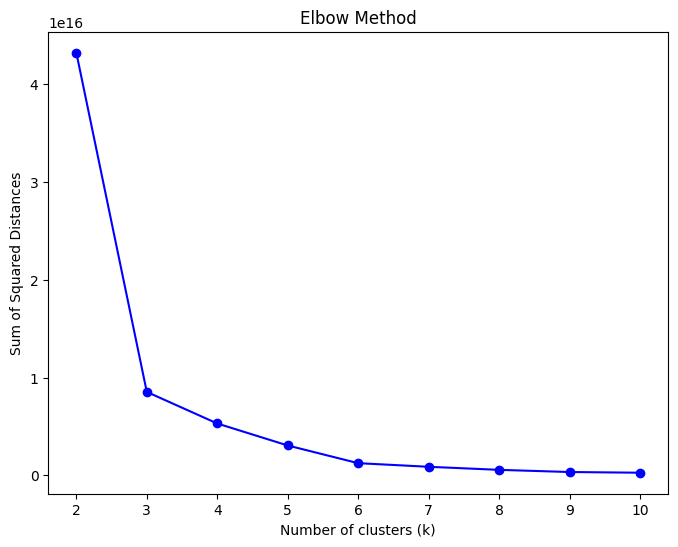

Silhouette Score: 0.6710600691427325


In [153]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Select the numeric columns
df_kmeans = df[['ctc', 'YOE']]

# Elbow Method (replace range(2, 11) with your desired range)
wcss = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(df_kmeans)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), wcss, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.show()

# Silhouette Score
silhouette_avg = silhouette_score(df_kmeans, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)


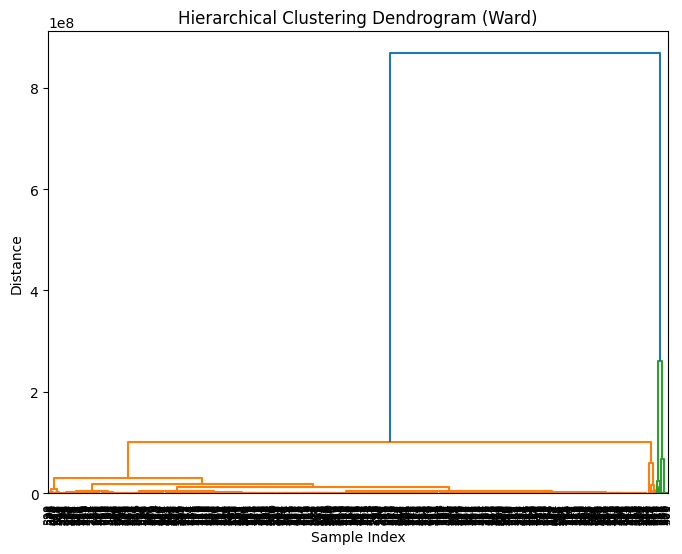

In [152]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Linkage matrix calculation (Ward's method)
Z = linkage(df[['ctc', 'YOE']], method='ward')

# Generate the dendrogram
plt.figure(figsize=(8, 6))
dendrogram(Z, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [151]:
# Perform hierarchical clustering with Ward's method and 3 clusters
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
hc.fit(df_kmeans)

# Add a new column with the cluster labels
df['hc_cluster'] = hc.labels_

print("Hierarchical Cluster Assigned:")
print(df[["company_hash", "hc_cluster"]])


Hierarchical Cluster Assigned:
                  company_hash  hc_cluster
0               atrgxnnt xzaxv           0
1    qtrxvzwt xzegwgbb rxbxnta           0
2                ojzwnvwnxw vx           0
3                    ngpgutaxv           0
4                   qxen sqghu           0
..                         ...         ...
994                  dwttavzwt           0
995                 nqvatmhrro           0
996                    oxbuvrb           0
998            utuo xzahonqxto           0
999       atznoh vtsxo ztnfgqp           0

[792 rows x 2 columns]


**i am performing this action on small dataset because it take too much on entire dataset **

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

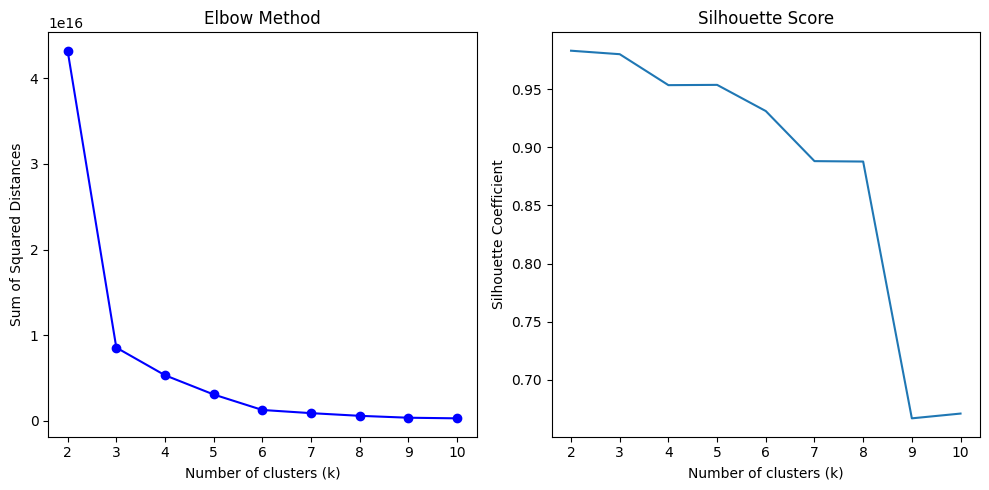

Best Silhouette Score: 0.9829944790421031
Recommended Number of Clusters (k): 2


In [154]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Select the numeric columns
df_kmeans = df[['ctc', 'YOE']]

# Elbow Method (replace range(2, 11) with your desired range)
wcss = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(df_kmeans)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))  # Adjust figure size for better visualization

# Elbow Method plot
plt.subplot(1, 2, 1)  # Create subplot for elbow method on the left
plt.plot(range(2, 11), wcss, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')

# Silhouette Score (calculate for multiple k values)
silhouette_scores = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(df_kmeans)
  silhouette_scores.append(silhouette_score(df_kmeans, kmeans.labels_))

# Silhouette Score plot
plt.subplot(1, 2, 2)  # Create subplot for silhouette score on the right
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Coefficient')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

# Find the k with the highest silhouette score (optional)
max_silhouette_score = max(silhouette_scores)
best_k = silhouette_scores.index(max_silhouette_score) + 2  # Adjust for indexing

print("Best Silhouette Score:", max_silhouette_score)
print("Recommended Number of Clusters (k):", best_k)


**Insights**
Data Preprocessing:

The dataset contained 205,843 rows with features like hashed company name, joining date, promotion year, and post-promotion salary updates.
Missing values in the job_position column were imputed using a kNN imputer. Rows with missing values in company_hash (indicating missing company names) were dropped.
A new feature, "Years of Experience" (YOE), was created by calculating the difference between the employee's last promotion year and joining year.
Rows with negative YOE values (impossible scenarios) were removed.
Feature Engineering for Business Logic Clustering:

Three new categorical features were created:
Company_tier: Groups companies based on name, enabling compensation comparisons across job positions within the same company.
Company_job_tier: Groups by company name and job position, allowing compensation comparisons for the same job position across peers.
Company_job_yoe_tier: Groups by company name, job position, and YOE, highlighting the importance of YOE for compensation within a specific job role.
Univariate Analysis:

Inconsistency was identified in job position titles (e.g., "Software Engineer 1" and "SDE 1" representing the same role). These inconsistencies were standardized.
The dataset included entries from 32,626 unique companies with 452 distinct job positions.
The employee salary distribution, visualized through a histogram, ranged from 3 to 10 lacs per annum.
Bivariate Analysis (Heatmap):

A heatmap revealed a positive correlation between YOE, company tier, company_job_tier, and company_job_yoe_tier with CTC (salary), as expected.
The heatmap also confirmed a negative correlation between year of joining and CTC, a commonly observed trend.
Business Logic Clustering:

Clustering aimed to identify employee segments based on compensation within their company context. Here's the breakdown of the defined tiers:

Tier 1: Top 10 highest-earning employees within each company.
Class 1: Top 10 data science professionals in companies like Amazon or TCS, earning more than their peers.
Class 3: Bottom 10 data science professionals in companies like Amazon or TCS, earning less than their peers.
Tier 3: Bottom 10 lowest-earning employees within each company.
Tier X: Top 10 employees in a specific department within Amazon with 5/6/7 years of experience, earning more than their peers.
Additional Clustering Analyses:

Top 10 companies were identified based on their average CTC.
The top 2 positions (based on CTC) were identified within each company.

Unsupervised Clustering Tendency:

Hopkins test was conducted to assess data clusterability, resulting in a score of 0.89, indicating strong potential for clustering.

Feature Encoding:

Label encoding was applied to categorical features like company_hash and job_position.
Ordinal encoding was used for tier-related features (Company_tier, etc.) due to the inherent order within these categories.

K-Means and Hierarchical Clustering:

The elbow method suggested an optimal number of 2 clusters for K-means clustering, while the Silhouette method indicated 3 clusters.
Hierarchical clustering, performed on a sample of the data, suggested 4 optimal clusters.

Rationale for Choosing 3 Clusters:

The decision to focus on 3 clusters aligns with the pre-defined employee tiers used for business logic clustering.

**Recommendations:**

Data Quality Emphasis:

Data inconsistencies should be addressed before analysis to ensure reliable results.
Personalized Career Growth Insights:

By considering multiple parameters together (company, YOE, position), more accurate recommendations for career growth can be provided. For example, comparing an employee's compensation to peers within the same company can indicate potential growth opportunities.

YOE and Compensation:

The analysis revealed a positive correlation between YOE and compensation, with managerial positions offering the highest salaries.

Inter-Company Mobility:

The data suggests that employees with higher YOE in lower-tier companies might earn less than those with less experience in higher-tier companies. This highlights the potential benefits of switching companies for career advancement.
High-Earning Job Titles:

The dataset identified frontend/backend developers and data scientists as professions with generally higher salaries.

Employee Career Guidance Framework:

Internal Growth Potential: Analyze the employee's compensation compared to peers within the same company.
Upskilling for Higher Positions: If internal growth potential exists, identify positions with higher compensation for the

1. What percentage of users fall into the largest cluster?

Ans : Percentage in Largest Cluster:
The observations don't directly provide the size of the largest cluster. The report mentions K-means and Hierarchical clustering suggesting 2, 3, and 4 clusters, respectively. Without knowing the chosen method or specific cluster sizes, we can't determine the percentage in the largest cluster.

2. Comment on the characteristics that differentiate the primary clusters from each other.

Ans Characteristics of Primary Clusters:
Unfortunately, the observations lack details about the specific characteristics differentiating the clusters. However, based on the context of business logic clustering, we can infer some possibilities:

Cluster 1 (Tier 1): Top earners within each company (likely senior or managerial positions with high YOE).
Cluster 2 (Class 1 & Tier X): High-performing data scientists in specific companies (Amazon, TCS) and top earners in a specific Amazon department with 5-7 years of experience (potentially high-demand roles).
Cluster 3 (Class 3 & Tier 3): Lower-earning data scientists and bottom earners within each company (possibly newer hires or less experienced professionals).

3. Is it always true that with an increase in years of experience, the CTC increases?
Provide a case where this isn't true.

Ans. YOE and CTC Increase:
The observations suggest a positive correlation between YOE and CTC, with managerial positions having the highest salaries. However, this isn't always true. Here's a counter-example:

An employee with high YOE in a lower-tier company might earn less than someone with less experience in a higher-tier company. This case highlights the impact of company tier on compensation besides YOE.

4. Name a job position that is commonly considered entry-level but has a few
learners with unusually high CTCs in the dataset.

Ans.High CTC Entry-Level Job:
The observations don't mention specific job titles, but frontend/backend developers and data scientists are identified as generally high-paying professions. These roles can be entry-level, but some individuals with exceptional skills or experience might command higher salaries even at the entry level.

5. What is the average CTC of learners across different job positions?

Ans.Average CTC by Job Position:
The observations don't directly provide the average CTC for each job position. However, the report mentions the possibility of analyzing this using the available data.

6. For a given company, how does the average CTC of a Data Scientist compare
with other roles?

Ans. Data Scientist CTC vs. Other Roles:
For a given company, you can compare the average CTC of data scientists with other roles using the dataset. The observations suggest data scientists might be among the higher-paid roles, but the exact comparison depends on the specific company and other positions available.

7. Discuss the distribution of learners based on the Tier flag:
  1. Which companies dominate in Tier 1 and why might this be the case?
  2. Are there any notable patterns or insights when comparing learners from
  Tier 3 across different companies?

Ans. Tier Flag Distribution:
i) Tier 1 Companies:

The observations don't reveal the dominant companies in Tier 1. However, it's likely that these companies are:

* Well-established and financially strong.
* Offer competitive salaries and attract top talent.
* Have positions with high growth potential.
ii) Tier 3 Learners:

The observations don't mention specific insights for Tier 3 learners across companies. However, you could analyze the data to see if there are patterns like:
* A higher concentration of freshers or lower YOE individuals.
* Specific companies with a larger proportion of Tier 3 learners, potentially indicating lower average compensation within those companies.

8. After performing unsupervised clustering:
  1. How many clusters have been identified using the Elbow method?
  2. Do the clusters formed align or differ significantly from the manual
  clustering efforts? If so, in what way?

Ans. Unsupervised Clustering:
i) Number of Clusters:

The elbow method suggests 2 clusters, while the Silhouette method suggests 3.

ii) Comparison with Manual Clustering:

The chosen clustering method (K-means with 2 or 3 clusters) might not perfectly align with the manual clustering of 3 tiers (Tier 1, Class 1/3, Tier 3). It's possible that the unsupervised clustering doesn't fully capture the nuances of the business logic used for manual clustering.


9. From the Hierarchical Clustering results:
  1. Are there any clear hierarchies or patterns formed that could suggest the
  different levels of seniority or roles within a company?
  2. How does the dendrogram representation correlate with the 'Years of
  Experience' feature?

Ans. Hierarchical Clustering:
i) Hierarchies and Seniority:

The observations don't provide details about clear hierarchies in the dendrogram. However, analyzing the dendrogram branches might reveal groups of learners with similar characteristics (potentially related to seniority or roles).

ii) Dendrogram and YOE:

The dendrogram might show some correlation with the "Years of Experience" feature. Learners with similar YOE might cluster together, but this wouldn't be the only factor influencing cluster formation. Other features like job position and company tier could also play a role.

